# Базовая нейросеть

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2200)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Самостоятельное задание

# 1. Цель задачи
# **Цель данной работы** — продемонстрировать применение алгоритма кластеризации HDBSCAN на синтетических данных, а затем на реальном датасете (Credit Card Fraud Detection). HDBSCAN — это алгоритм кластеризации на основе плотности, который автоматически определяет количество кластеров и устойчив к выбросам.

# 2. Работа с синтетическими данными

## 2.1 Импорт библиотек

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import hdbscan
import seaborn as sns

## 2.2 Генерация данных

In [36]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.8, random_state=42)
X = StandardScaler().fit_transform(X)  # Масштабирование

## 2.3 Масштабирование данных

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2.4 Визуализация данных

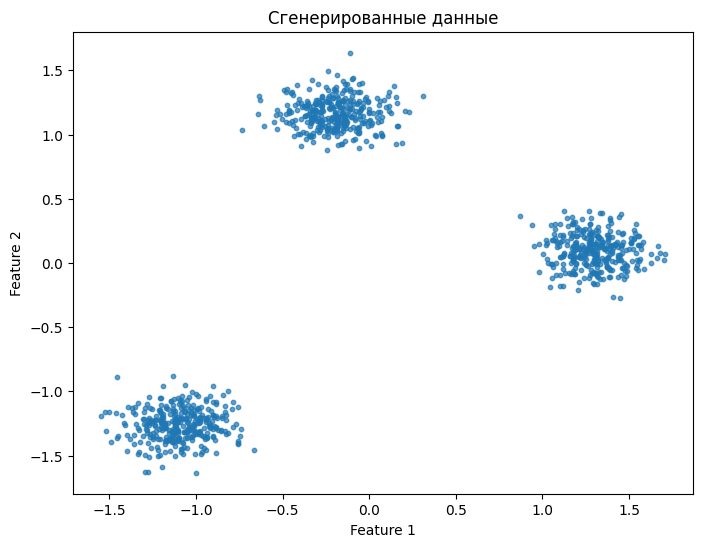

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.title("Сгенерированные данные")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 3. Обучение модели HDBSCAN

In [39]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(X_scaled)
labels = clusterer.labels_
n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
print(f"Найдено кластеров: {n_clusters}")

Найдено кластеров: 3


C:\Users\1\Desktop\laba_4\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\1\Desktop\laba_4\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 4. Визуализация предсказанных кластеров

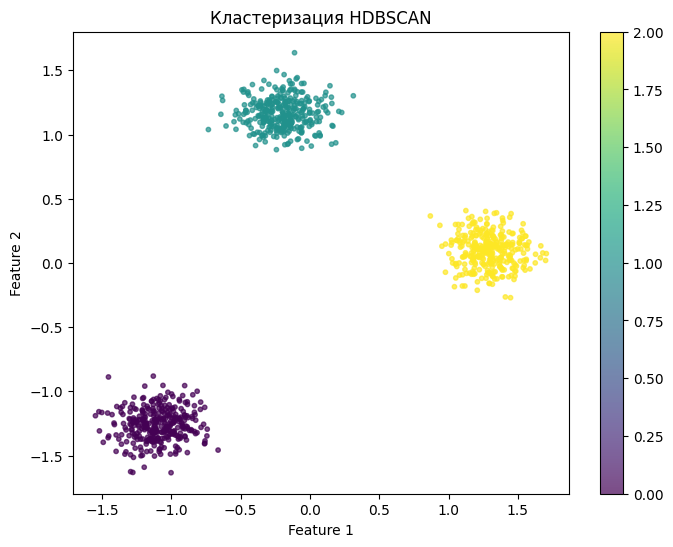

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Кластеризация HDBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()

# 5. Интерпретация результатов
## HDBSCAN успешно выделил 3 кластера, соответствующих исходному распределению. Точки, помеченные как -1, являются шумом. Алгоритм автоматически определил количество кластеров, что делает его удобным для задач, где число кластеров заранее неизвестно.

# 6. Применение HDBSCAN к реальным данным (Credit Card Fraud Detection)

## 6.1 Импорт библиотек

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import hdbscan
import matplotlib.pyplot as plt


## 6.2 Получение данных

In [42]:
# Загрузка данных
data = pd.read_csv("creditcard.csv")  # Загрузка датасета мошенничества с кредитными картами

# Подготовка данных
X = data.drop(columns=['Class', 'Time'])  # Убираем метки и временные признаки
y = data['Class']

# Проверяем пропущенные значения
print("Пропущенные значения:\n", data.isnull().sum())

# Удаляем строки с NaN (если их мало)
data_cleaned = data.dropna()
print("Оставшееся количество строк:", len(data_cleaned))

# Обновляем X и y после очистки
X = data_cleaned.drop(columns=['Class', 'Time'])
y = data_cleaned['Class']

# Проверяем, остались ли NaN после удаления
print("NaN после удаления:", X.isnull().sum().sum())

Пропущенные значения:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Оставшееся количество строк: 71395
NaN после удаления: 0


In [43]:
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')  # Заполняем медианой
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    print("NaN после заполнения:", X.isnull().sum().sum())

## 6.3 Масштабирование данных

In [44]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Проверяем, что в данных нет NaN перед PCA
assert not np.isnan(X_scaled).any(), "Остались пропущенные значения!"

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


## 6.4 Визуализация данных (PCA для уменьшения размерности)

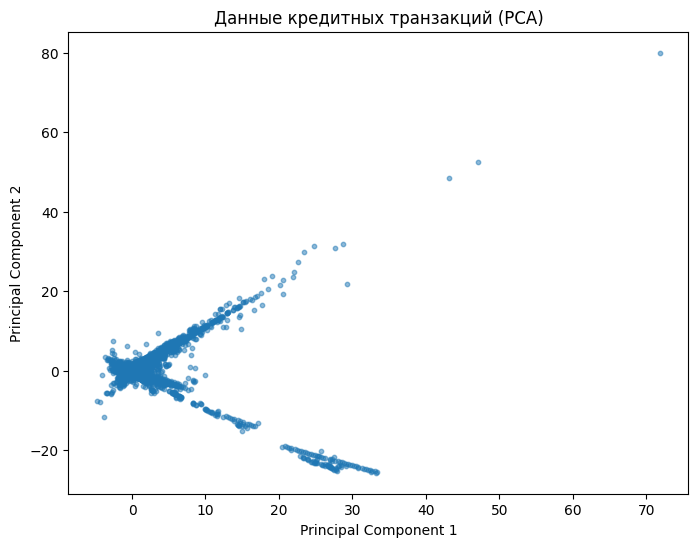

In [45]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.5)
plt.title("Данные кредитных транзакций (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 7. Обучение HDBSCAN

In [46]:

clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
clusterer.fit(X_pca)
labels = clusterer.labels_

C:\Users\1\Desktop\laba_4\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\1\Desktop\laba_4\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 8. Визуализация предсказанных выбросов

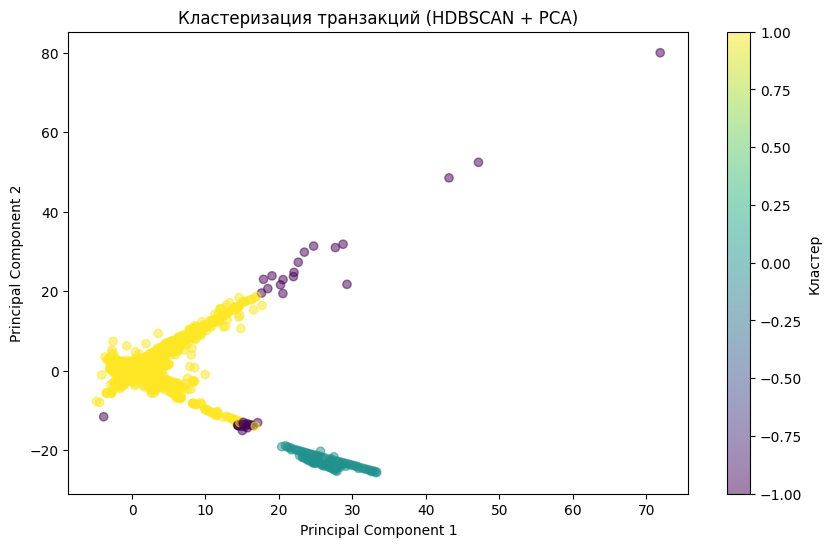

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Кластер')
plt.title("Кластеризация транзакций (HDBSCAN + PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 9. Интерпретация результатов
## HDBSCAN выделил несколько кластеров, при этом точки с label=-1 могут рассматриваться как аномалии (подозрительные транзакции). Сравнение с реальными метками (Class=1 — мошенничество) показывает, что алгоритм может быть полезен для обнаружения мошеннических операций.